**Primeira parte: Análise de Portfólio**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [ ]:
acoes = ['ITUB4.SA', 'BBDC4.SA', 'DIRR3.SA', 'JBSS3.SA','GUAR3.SA', 'PSSA3.SA']

ydata = yf.download(acoes, '2015-01-01', '2023-12-31', '1d');
dados = ydata["Adj Close"]

[*********************100%%**********************]  6 of 6 completed


In [ ]:
dados = dados *100 / dados.iloc[0]
display(dados)

Ticker,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.206235,95.179235,96.835284,100.502521,100.473963,99.806445
2015-01-06,103.502652,92.459822,96.517569,102.128311,98.104265,98.548350
2015-01-07,107.615911,94.190370,98.289323,105.823238,100.853093,98.709652
2015-01-08,108.170227,95.920876,96.847494,107.478543,101.706148,98.064512
...,...,...,...,...,...,...
2023-12-21,191.315538,452.956435,80.878837,262.952384,318.073028,286.426100
2023-12-22,191.909008,460.183336,81.740556,267.122430,318.713803,290.932791
2023-12-26,192.479140,457.420128,84.448831,269.849006,320.379767,290.432059


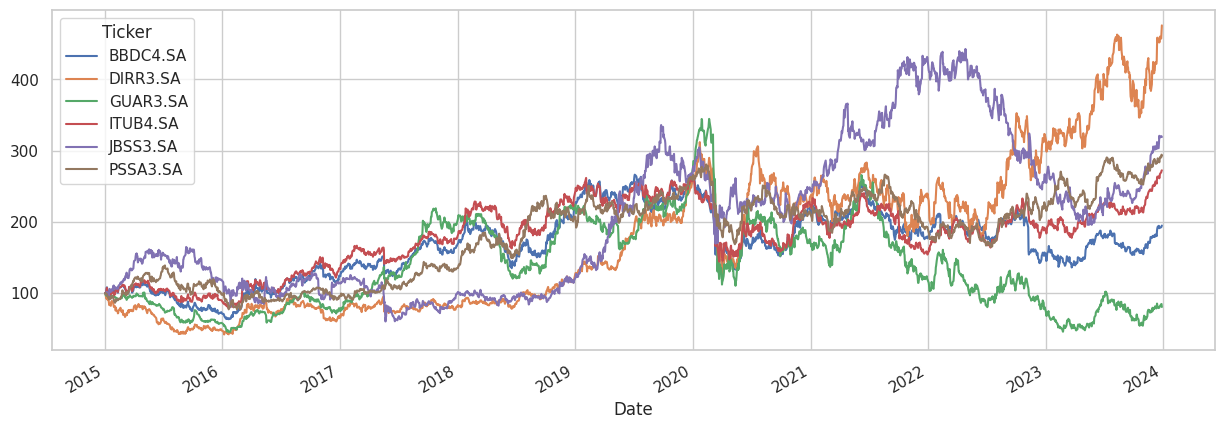

In [ ]:
dados.plot(figsize = (15,5));

In [ ]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_acc = (dados.iloc[-1] / dados.iloc[0])-1
print("Retorno acumulado:\n", ret_acc)

Retorno acumulado:
 Ticker
BBDC4.SA    0.948738
DIRR3.SA    3.759125
GUAR3.SA   -0.194905
ITUB4.SA    1.724152
JBSS3.SA    2.192264
PSSA3.SA    1.931144
dtype: float64


In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Retorno anualizado:\n", ret_aa)

Retorno anualizado:
 Ticker
BBDC4.SA    0.142749
DIRR3.SA    0.366172
GUAR3.SA   -0.042432
ITUB4.SA    0.221930
JBSS3.SA    0.261304
PSSA3.SA    0.239959
dtype: float64


In [ ]:
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol anualizada:\n", vol_aa)

Vol anualizada:
 Ticker
BBDC4.SA    0.360784
DIRR3.SA    0.450228
GUAR3.SA    0.505689
ITUB4.SA    0.320225
JBSS3.SA    0.467692
PSSA3.SA    0.310871
dtype: float64


In [ ]:
#Calculo da correlação dos dados
dados_chg.corr()

Ticker,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
Ticker,,,,,,
BBDC4.SA,1.000000,0.437996,0.431043,0.856552,0.264795,0.385958
DIRR3.SA,0.437996,1.000000,0.480279,0.432133,0.175174,0.301040
GUAR3.SA,0.431043,0.480279,1.000000,0.422190,0.177517,0.314475
ITUB4.SA,0.856552,0.432133,0.422190,1.000000,0.240460,0.393054
JBSS3.SA,0.264795,0.175174,0.177517,0.240460,1.000000,0.166978
PSSA3.SA,0.385958,0.301040,0.314475,0.393054,0.166978,1.000000


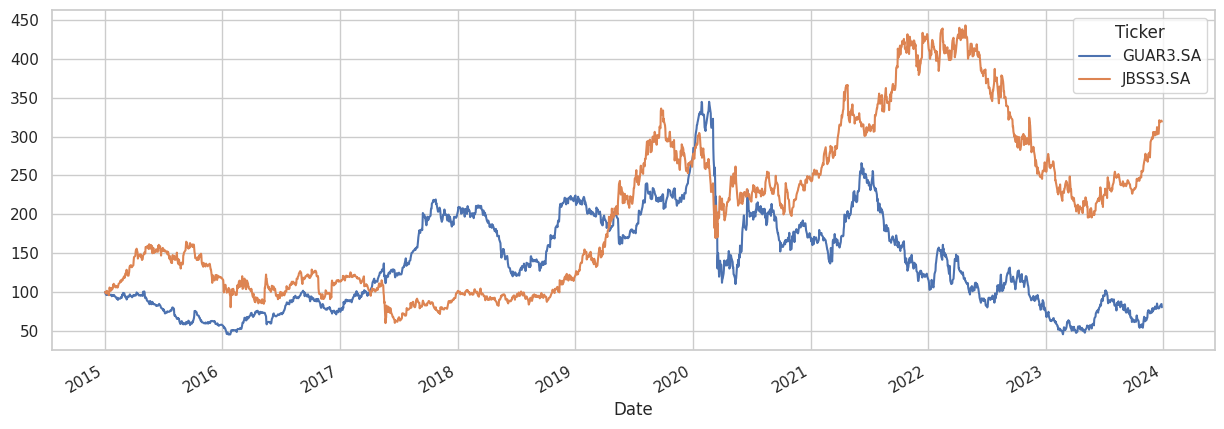

In [ ]:
dados[['GUAR3.SA', 'JBSS3.SA']].plot(figsize = (15,5));

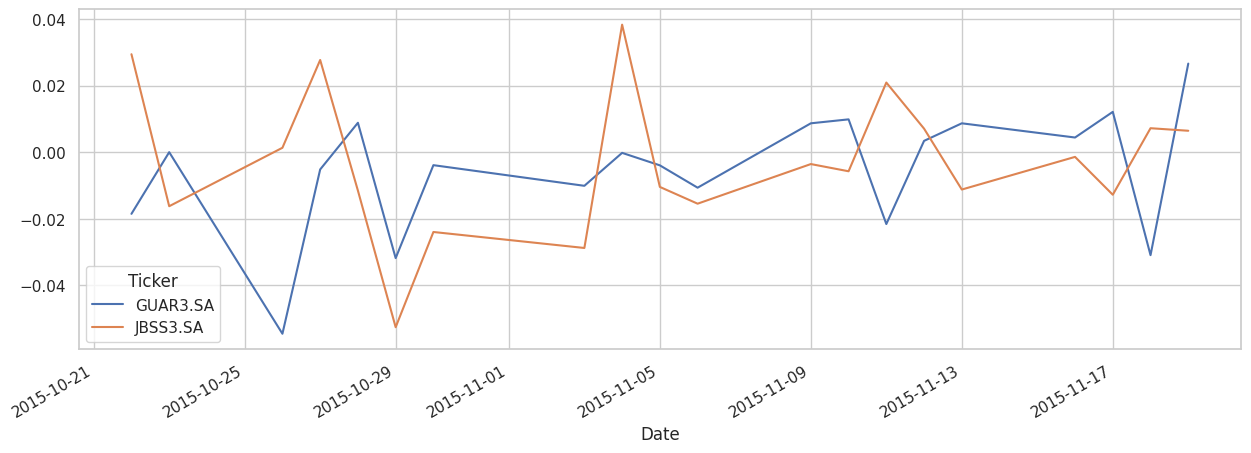

In [ ]:
dados_chg[['GUAR3.SA', 'JBSS3.SA']].iloc[200:220].plot(figsize = (15,5));

In [ ]:
port_pesos = [0, 0, 0.5, 0, 0.5, 0]
dados['PORT1'] = dados.dot(port_pesos)

In [ ]:
display(dados)

Ticker,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA,PORT1
Date,,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.206235,95.179235,96.835284,100.502521,100.473963,99.806445,98.654623
2015-01-06,103.502652,92.459822,96.517569,102.128311,98.104265,98.548350,97.310917
2015-01-07,107.615911,94.190370,98.289323,105.823238,100.853093,98.709652,99.571208
2015-01-08,108.170227,95.920876,96.847494,107.478543,101.706148,98.064512,99.276821
...,...,...,...,...,...,...,...
2023-12-21,191.315538,452.956435,80.878837,262.952384,318.073028,286.426100,199.475933
2023-12-22,191.909008,460.183336,81.740556,267.122430,318.713803,290.932791,200.227179
2023-12-26,192.479140,457.420128,84.448831,269.849006,320.379767,290.432059,202.414299


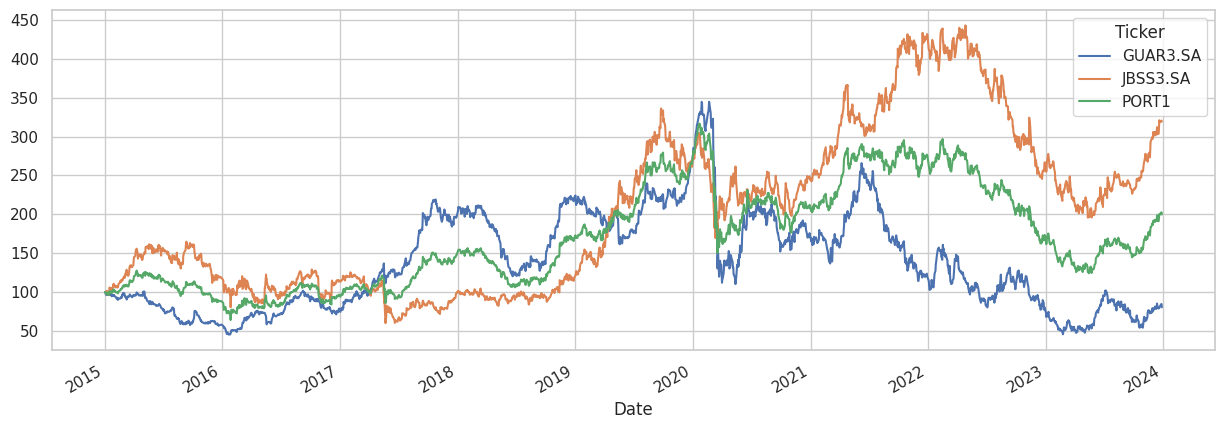

In [ ]:
dados[['GUAR3.SA', 'JBSS3.SA', 'PORT1']].plot(figsize = (15,5));

In [ ]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_acc = (dados.iloc[dados.count()[0]-1] / dados.iloc[0])-1
print("Retorno acumulado:\n", ret_acc)
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Ret aa:\n", ret_aa)

Retorno acumulado:
 Ticker
BBDC4.SA    0.948738
DIRR3.SA    3.759125
GUAR3.SA   -0.194905
ITUB4.SA    1.724152
JBSS3.SA    2.192264
PSSA3.SA    1.931144
PORT1       0.998680
dtype: float64
Ret aa:
 Ticker
BBDC4.SA    0.142749
DIRR3.SA    0.366172
GUAR3.SA   -0.042432
ITUB4.SA    0.221930
JBSS3.SA    0.261304
PSSA3.SA    0.239959
PORT1       0.148547
dtype: float64


In [ ]:
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Vol aa:
 Ticker
BBDC4.SA    0.360784
DIRR3.SA    0.450228
GUAR3.SA    0.505689
ITUB4.SA    0.320225
JBSS3.SA    0.467692
PSSA3.SA    0.310871
PORT1       0.355954
dtype: float64


In [ ]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

BBDC4.SA   -52.767218
DIRR3.SA   -60.957039
GUAR3.SA   -86.712283
ITUB4.SA   -45.213971
JBSS3.SA   -63.482697
PSSA3.SA   -44.466915
PORT1      -60.754011
dtype: float64


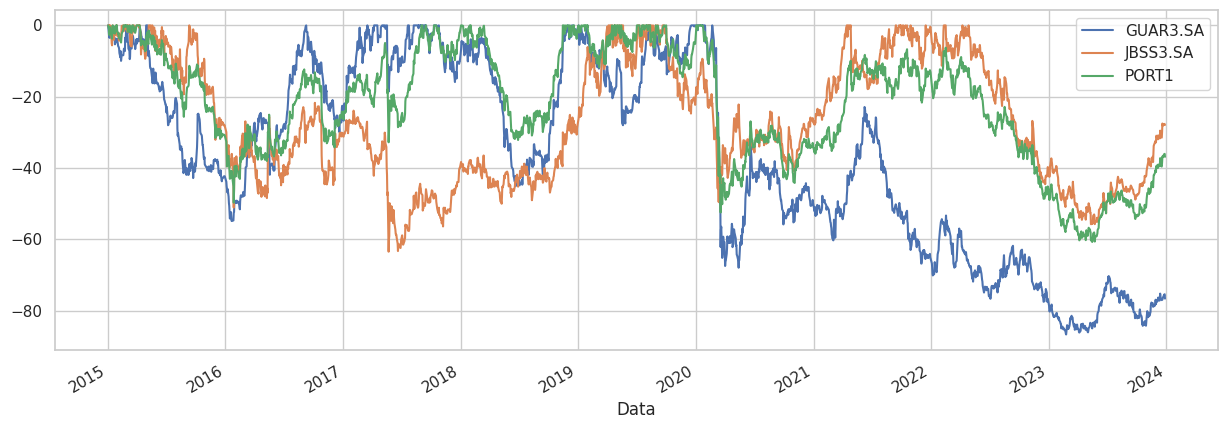

In [ ]:
ddown[['GUAR3.SA', 'JBSS3.SA', 'PORT1']].plot(figsize = (15,5));

**Segunda parte: Fronteira Eficiente de Markowitz**

In [ ]:
dados=dados.drop(['PORT1'], axis=1)
dados_chg=dados_chg.drop(['PORT1'], axis=1)

In [ ]:
dados

Ticker,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.206235,95.179235,96.835284,100.502521,100.473963,99.806445
2015-01-06,103.502652,92.459822,96.517569,102.128311,98.104265,98.548350
2015-01-07,107.615911,94.190370,98.289323,105.823238,100.853093,98.709652
2015-01-08,108.170227,95.920876,96.847494,107.478543,101.706148,98.064512
...,...,...,...,...,...,...
2023-12-21,191.315538,452.956435,80.878837,262.952384,318.073028,286.426100
2023-12-22,191.909008,460.183336,81.740556,267.122430,318.713803,290.932791
2023-12-26,192.479140,457.420128,84.448831,269.849006,320.379767,290.432059


In [ ]:
def calc_ret_vol(ativos, ativos_chg, port_pesos):
  port = ativos.dot(port_pesos)
  port_chg =port.pct_change()
  port_chg = port_chg.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/5))-1
  vol = port_chg.std()*np.sqrt(252)
  return ret, vol

In [ ]:
#Portfolio com 2 ativos: JBSS3 e GUAR3
points = []
min_vol_ret = [100, 0] #[vol, ret]
port_pesos = [0, 0, 0, 0, 0, 0]
for w in range(0, 101, 5):
  ret, vol = calc_ret_vol(dados, dados_chg, [0, 0,  w/100, 0, (1-w/100), 0])
  print(f"Aloc:{round(w/100, 2):.2f} {round(1-(w/100),2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
  points.append([ret, vol])
  if vol < min_vol_ret[0]:
    min_vol_ret[0] = vol
    min_vol_ret[1] = ret
    port_pesos[2] = w/100
    port_pesos[4] = 1-w/100

Aloc:0.00 1.00 Ret:0.261 Vol:0.468
Aloc:0.05 0.95 Ret:0.252 Vol:0.451
Aloc:0.10 0.90 Ret:0.242 Vol:0.435
Aloc:0.15 0.85 Ret:0.232 Vol:0.420
Aloc:0.20 0.80 Ret:0.221 Vol:0.407
Aloc:0.25 0.75 Ret:0.210 Vol:0.395
Aloc:0.30 0.70 Ret:0.199 Vol:0.384
Aloc:0.35 0.65 Ret:0.187 Vol:0.375
Aloc:0.40 0.60 Ret:0.175 Vol:0.367
Aloc:0.45 0.55 Ret:0.162 Vol:0.360
Aloc:0.50 0.50 Ret:0.149 Vol:0.356
Aloc:0.55 0.45 Ret:0.134 Vol:0.354
Aloc:0.60 0.40 Ret:0.120 Vol:0.354
Aloc:0.65 0.35 Ret:0.104 Vol:0.356
Aloc:0.70 0.30 Ret:0.088 Vol:0.362
Aloc:0.75 0.25 Ret:0.070 Vol:0.372
Aloc:0.80 0.20 Ret:0.051 Vol:0.386
Aloc:0.85 0.15 Ret:0.031 Vol:0.404
Aloc:0.90 0.10 Ret:0.009 Vol:0.430
Aloc:0.95 0.05 Ret:-0.016 Vol:0.462
Aloc:1.00 0.00 Ret:-0.042 Vol:0.506


In [ ]:
print(min_vol_ret)
print(port_pesos)

[0.35352367173390437, 0.1196974641521007]
[0, 0, 0.6, 0, 0.4, 0]


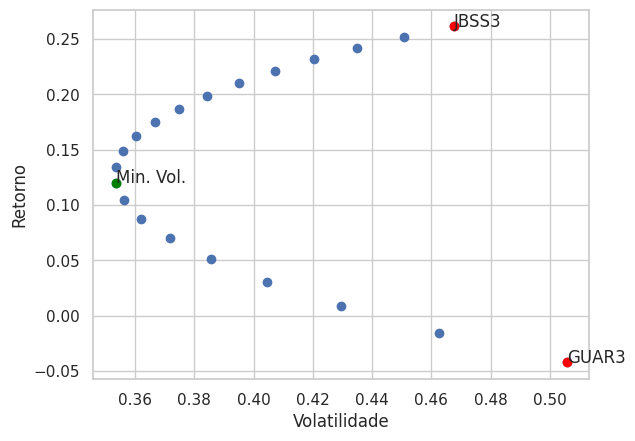

In [ ]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['GUAR3.SA'], ret_aa['GUAR3.SA'], color='red');
plt.text(vol_aa['GUAR3.SA'], ret_aa['GUAR3.SA'], 'GUAR3');

plt.scatter(vol_aa['JBSS3.SA'], ret_aa['JBSS3.SA'], color='red');
plt.text(vol_aa['JBSS3.SA'], ret_aa['JBSS3.SA'], 'JBSS3');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [ ]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Ret aa:\n", ret_aa)
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Ret aa:
 Ticker
BBDC4.SA    0.142749
DIRR3.SA    0.366172
GUAR3.SA   -0.042432
ITUB4.SA    0.221930
JBSS3.SA    0.261304
PSSA3.SA    0.239959
PORT1       0.119697
dtype: float64
Vol aa:
 Ticker
BBDC4.SA    0.360784
DIRR3.SA    0.450228
GUAR3.SA    0.505689
ITUB4.SA    0.320225
JBSS3.SA    0.467692
PSSA3.SA    0.310871
PORT1       0.353524
dtype: float64


In [ ]:
#Calcular drawdown
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

BBDC4.SA   -52.767218
DIRR3.SA   -60.957039
GUAR3.SA   -86.712283
ITUB4.SA   -45.213971
JBSS3.SA   -63.482697
PSSA3.SA   -44.466915
PORT1      -65.599654
dtype: float64


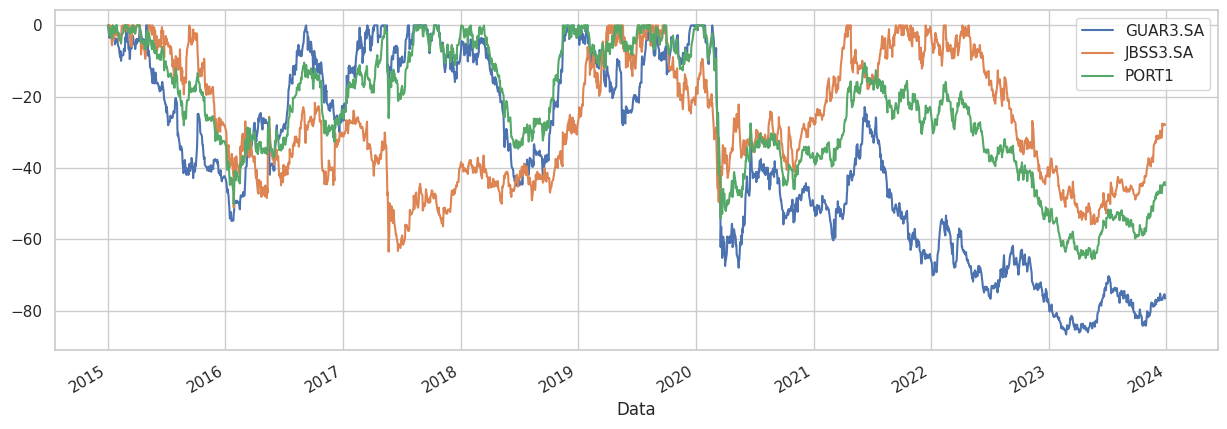

In [ ]:
ddown[['GUAR3.SA', 'JBSS3.SA', 'PORT1']].plot(figsize = (15,5));

In [ ]:
dados=dados.drop(['PORT1'], axis=1)
dados_chg=dados_chg.drop(['PORT1'], axis=1)

In [ ]:
#Portfolio com 3 ativos: JBSS3, GUAR3 e PSSA3
points = []
min_vol_ret = [100, 0]
port_pesos = [0, 0, 0, 0, 0, 0]
for w1 in range(0, 101, 5):
  for w2 in range(0, 101-w1, 5):
    ret, vol = calc_ret_vol(dados, dados_chg, [0, 0, w1/100, 0, w2/100, (1-w1/100-w2/100)])
    #print("Aloc:", round(w1/100, 2), round(w2/100, 2), round(1-w1/100-w2/100, 2), "Ret:", round(ret, 3), "Vol:", round(vol, 3))
    print(f"Aloc:{round(w1/100, 2):.2f} {round(w2/100, 2):.2f} {round(1-w1/100-w2/100, 2):.2f} Ret:{round(ret, 3):.3f} Vol:{round(vol, 3):.3f}")
    points.append([ret, vol])
    if vol < min_vol_ret[0]:
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      port_pesos[2] = w1/100
      port_pesos[4] = w2/100
      port_pesos[5] = 1-w1/100-w2/100

Aloc:0.00 0.00 1.00 Ret:0.240 Vol:0.311
Aloc:0.00 0.05 0.95 Ret:0.241 Vol:0.299
Aloc:0.00 0.10 0.90 Ret:0.242 Vol:0.289
Aloc:0.00 0.15 0.85 Ret:0.243 Vol:0.282
Aloc:0.00 0.20 0.80 Ret:0.244 Vol:0.277
Aloc:0.00 0.25 0.75 Ret:0.245 Vol:0.275
Aloc:0.00 0.30 0.70 Ret:0.247 Vol:0.275
Aloc:0.00 0.35 0.65 Ret:0.248 Vol:0.278
Aloc:0.00 0.40 0.60 Ret:0.249 Vol:0.283
Aloc:0.00 0.45 0.55 Ret:0.250 Vol:0.290
Aloc:0.00 0.50 0.50 Ret:0.251 Vol:0.299
Aloc:0.00 0.55 0.45 Ret:0.252 Vol:0.310
Aloc:0.00 0.60 0.40 Ret:0.253 Vol:0.323
Aloc:0.00 0.65 0.35 Ret:0.254 Vol:0.336
Aloc:0.00 0.70 0.30 Ret:0.255 Vol:0.352
Aloc:0.00 0.75 0.25 Ret:0.256 Vol:0.368
Aloc:0.00 0.80 0.20 Ret:0.257 Vol:0.386
Aloc:0.00 0.85 0.15 Ret:0.258 Vol:0.404
Aloc:0.00 0.90 0.10 Ret:0.259 Vol:0.424
Aloc:0.00 0.95 0.05 Ret:0.260 Vol:0.445
Aloc:0.00 1.00 0.00 Ret:0.261 Vol:0.468
Aloc:0.05 0.00 0.95 Ret:0.231 Vol:0.305
Aloc:0.05 0.05 0.90 Ret:0.232 Vol:0.293
Aloc:0.05 0.10 0.85 Ret:0.233 Vol:0.283
Aloc:0.05 0.15 0.80 Ret:0.234 Vol:0.276


In [ ]:
print(min_vol_ret)
print(port_pesos)

[0.265626802210483, 0.20666158868920537]
[0, 0, 0.2, 0, 0.2, 0.6000000000000001]


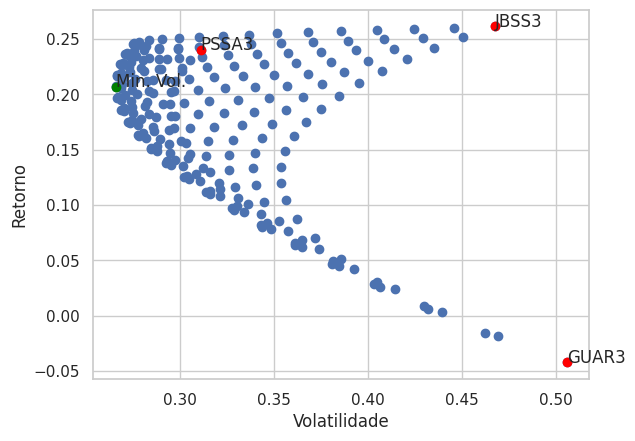

In [ ]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(vol_aa['GUAR3.SA'], ret_aa['GUAR3.SA'], color='red');
plt.text(vol_aa['GUAR3.SA'], ret_aa['GUAR3.SA'], 'GUAR3');

plt.scatter(vol_aa['JBSS3.SA'], ret_aa['JBSS3.SA'], color='red');
plt.text(vol_aa['JBSS3.SA'], ret_aa['JBSS3.SA'], 'JBSS3');

plt.scatter(vol_aa['PSSA3.SA'], ret_aa['PSSA3.SA'], color='red');
plt.text(vol_aa['PSSA3.SA'], ret_aa['PSSA3.SA'], 'PSSA3');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [ ]:
dados['PORT1'] = dados.dot(port_pesos)
dados_chg = (dados - dados.shift(1)) / dados.shift(1)
dados_chg = dados_chg.fillna(0)

In [ ]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/5))-1
print("Ret aa:\n", ret_aa)
vol_aa = dados_chg.std()*np.sqrt(252)
print("Vol aa:\n", vol_aa)

Ret aa:
 Ticker
BBDC4.SA    0.142749
DIRR3.SA    0.366172
GUAR3.SA   -0.042432
ITUB4.SA    0.221930
JBSS3.SA    0.261304
PSSA3.SA    0.239959
PORT1       0.206662
dtype: float64
Vol aa:
 Ticker
BBDC4.SA    0.360784
DIRR3.SA    0.450228
GUAR3.SA    0.505689
ITUB4.SA    0.320225
JBSS3.SA    0.467692
PSSA3.SA    0.310871
PORT1       0.265627
dtype: float64


In [ ]:
#Calcular drawdown (valor de queda de um ativo em comparação ao valor máximo de cotação anterior)
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]):
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1)*100)
  ddown[ativo]=list

ddown['Data']=dados.index.values
ddown.set_index(keys = 'Data', inplace = True)

#display(ddown)
print(ddown.min())

BBDC4.SA   -52.767218
DIRR3.SA   -60.957039
GUAR3.SA   -86.712283
ITUB4.SA   -45.213971
JBSS3.SA   -63.482697
PSSA3.SA   -44.466915
PORT1      -41.515823
dtype: float64


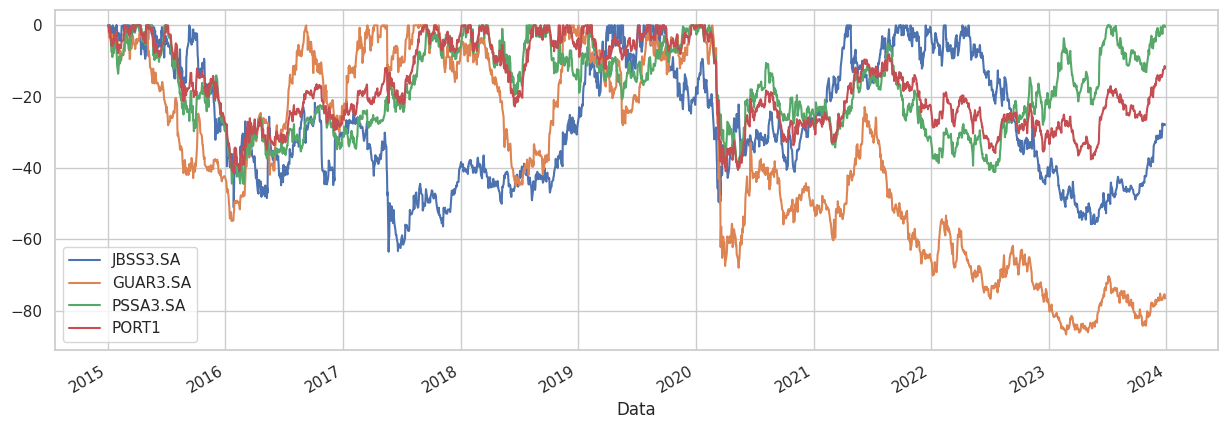

In [ ]:
ddown[['JBSS3.SA', 'GUAR3.SA', 'PSSA3.SA', 'PORT1']].plot(figsize = (15,5));

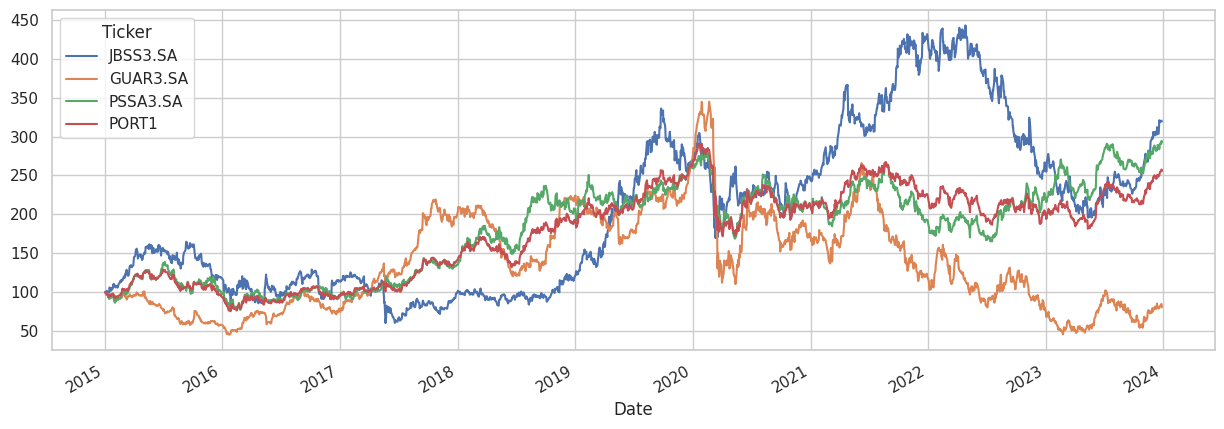

In [ ]:
dados[['JBSS3.SA', 'GUAR3.SA', 'PSSA3.SA', 'PORT1']].plot(figsize = (15,5));